This requires you to write a 2D GAN game. I let you to get into the topic yourself, whitout any explonations from my side. You can watch internet, read papers and tutorials (fun, fun, fun).

### Homework

I want you to implement a simple 2D GAN game. The kind of animation, I want to see is like in [this video](https://www.youtube.com/watch?v=KeJINHjyzOU&feature=youtu.be&t=15m38s) at 15:36 or in [here](https://habrahabr.ru/post/275429/) **but in 2D**. You can google, search code at github, whatever, but the network should be based on TensoFlow.

Basically you will need to come up with true distribution $P$, say mixture of gaussians (surprise me), sample some data from it. Visualize it as a heatmap. To visualize $G$ density you can fix $N$ noise vectors $\{z_i\} \quad i=1,\dots, N$ and draw a circle for each $G(z_i)$. It is also funny to visualize discriminator as a vector field (can be done with `plt.arrow`, `plt.quiver` plot). Look how it should be in the middle of [this page](http://www.inference.vc/an-alternative-update-rule-for-generative-adversarial-networks/).

Please, make sure your code works if 'Run All' is pressed and it draws some animation.

Good luck!

In [0]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

mnist=input_data.read_data_sets("MNIST_data")

W0807 09:51:39.326717 140090319914880 deprecation.py:323] From <ipython-input-3-946b340fa2a5>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0807 09:51:39.328257 140090319914880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0807 09:51:39.329791 140090319914880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0807 09:51:40.109057 140090319914880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0807 09:51:40.424135 140090319914880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
def generator(inpt, reuse=None):
    with tf.variable_scope('generator', reuse=reuse):
        l1 = tf.layers.dense(inputs = inpt, units=128, activation = tf.nn.leaky_relu)
        l2 = tf.layers.dense(inputs = l1, units=256, activation = tf.nn.leaky_relu)
        l0 = tf.layers.dense(inputs = l2, units=784, activation = tf.nn.tanh)
            
    return l0

In [0]:
def discriminator(inpt, reuse=None):
    with tf.variable_scope('discriminator', reuse=reuse):
        l1 = tf.layers.dense(inputs = inpt, units=128, activation = tf.nn.leaky_relu)
        l2 = tf.layers.dense(inputs = l1, units=128, activation = tf.nn.leaky_relu)
        logits = tf.layers.dense(inputs = l2, units=1)
        l0 = tf.sigmoid(logits)
            
    return l0, logits

In [0]:
tf.reset_default_graph()

In [0]:
tX = tf.placeholder(tf.float32,shape=[None,784])
tZ = tf.placeholder(tf.float32,shape=[None,100])

In [8]:
gen = generator(tZ)
d_real, d_logits_real = discriminator(tX)
d_fake, d_logits_fake = discriminator(gen, reuse = True)

W0807 09:51:46.342123 140090319914880 deprecation.py:323] From <ipython-input-4-724feb13abe4>:3: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0807 09:51:46.357612 140090319914880 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
def cost_function(logits,labels):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = labels))

In [10]:
d_real_loss = cost_function(d_logits_real, tf.ones_like(d_logits_real)*0.95)
d_fake_loss= cost_function(d_logits_fake, tf.zeros_like(d_logits_real))

W0807 09:51:49.986807 140090319914880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
gen_loss= cost_function(d_logits_fake, tf.ones_like(d_logits_fake))
disc_loss=d_real_loss+d_fake_loss

In [0]:
trainables=tf.trainable_variables()
gen_trainers=[var for var in trainables if 'generator' in var.name]
disc_trainers=[var for var in trainables if 'discriminator' in var.name]

In [0]:
learning_rate = 0.001
epochs = 1000
batch_size = 100
pretrained = 400

In [0]:
gen_op = tf.train.AdamOptimizer(learning_rate).minimize(gen_loss, var_list=gen_trainers)
disc_op = tf.train.AdamOptimizer(learning_rate).minimize(disc_loss, var_list=disc_trainers)

In [0]:
import os

In [0]:
if not os.path.exists('imaginator/'):
    os.makedirs('imaginator/')

In [0]:
init = tf.global_variables_initializer()

Epoch 1 of 1000 took 7.287s
The Discriminator loss is 1.297804832458496 and the Generator loss is 14.245400428771973.
Epoch 2 of 1000 took 6.989s
The Discriminator loss is 0.3471933603286743 and the Generator loss is 12.045433044433594.
Epoch 3 of 1000 took 7.147s
The Discriminator loss is 0.40926411747932434 and the Generator loss is 4.607583045959473.
Epoch 4 of 1000 took 6.937s
The Discriminator loss is 0.6104105710983276 and the Generator loss is 4.330989837646484.
Epoch 5 of 1000 took 6.873s
The Discriminator loss is 0.7037864327430725 and the Generator loss is 4.225381374359131.
Epoch 6 of 1000 took 6.756s
The Discriminator loss is 0.3617555499076843 and the Generator loss is 5.291323661804199.
Epoch 7 of 1000 took 6.776s
The Discriminator loss is 0.9216457605361938 and the Generator loss is 4.633940696716309.
Epoch 8 of 1000 took 6.896s
The Discriminator loss is 0.7716177701950073 and the Generator loss is 11.898930549621582.
Epoch 9 of 1000 took 7.419s
The Discriminator loss is

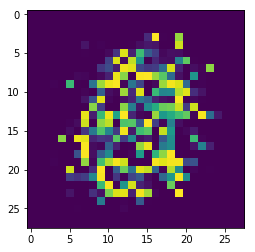

In [32]:
generated = []

import time

with tf.Session() as sess:
    sess.run(init)
    
    disc_cost = []
    gen_cost = []
    
    for epoch in range(epochs):
        
        num_batches = mnist.train.num_examples//batch_size
        start_time = time.time()
        
        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            batch_X = batch[0].reshape((batch_size, 784))
            batch_X = batch_X*2-1
            batch_Z = np.random.uniform(-1,1,size=(batch_size, 100))
            
            #train
            _, d_loss = sess.run([disc_op, disc_loss], feed_dict={tX:batch_X, tZ:batch_Z})
            _, g_loss = sess.run([gen_op, gen_loss], feed_dict={tZ:batch_Z})
            
            disc_cost.append(d_loss)
            gen_cost.append(g_loss) 
            
        print("Epoch {} of {} took {:.3f}s".format(epoch + 1, epochs, time.time() - start_time))
        print("The Discriminator loss is {} and the Generator loss is {}.".format(d_loss, g_loss, time.time() - start_time))

        
        if epoch%100 == 0 and epoch>= pretrained:
            print("Now Images are being generated")
            sample=np.random.uniform(-1,1,size=(1,100))
            gen_sample=sess.run(generator(tZ,reuse=True), feed_dict={tZ:sample})
            img = plt.imshow(gen_sample.reshape(28,28))
            generated.append(img) #was running this in google collab so did this also:DD
            plt.savefig(f"imaginator/Sample{epoch}_{np.abs(np.around(float(np.random.randn(1)),2))}.png") 

In [44]:
ls imaginator/

Sample400_0.71.png  Sample600_0.28.png  Sample800_0.3.png
Sample500_1.33.png  Sample700_1.59.png  Sample900_1.46.png


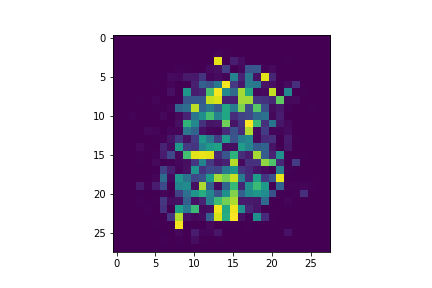

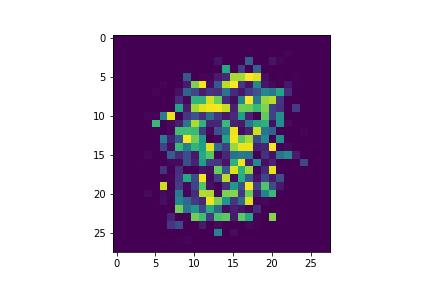

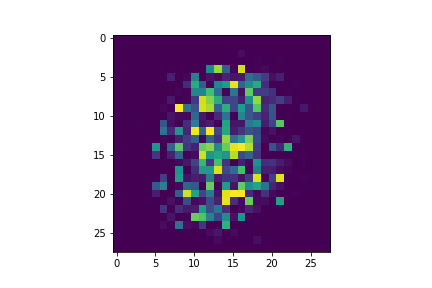

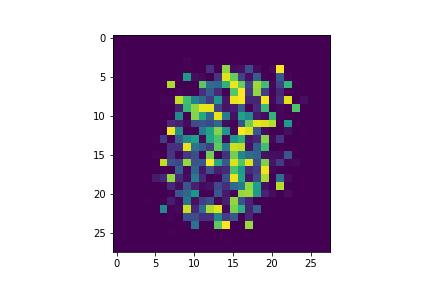

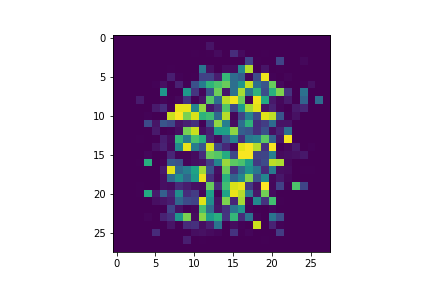

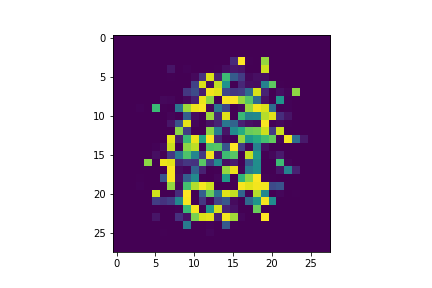

In [47]:
from IPython.display import display, Image
display(Image(filename='imaginator/Sample400_0.71.png'))
display(Image(filename='imaginator/Sample500_1.33.png'))
display(Image(filename='imaginator/Sample600_0.28.png'))
display(Image(filename='imaginator/Sample700_1.59.png'))
display(Image(filename='imaginator/Sample800_0.3.png'))
display(Image(filename='imaginator/Sample900_1.46.png'))